In [1]:
import uproot
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
log_columns = [
               'fV0cosPA', 
               'fCascCosPA',
               'fDCAV0daughters', 
               'fDCAv0topv'
               ]

custom_ranges = {
    # 'fMassOmega': (1.5, 2.1),
    'fPt': (0, 6),
    'fBachPt': (0, 2.0),
    # 'fV0cosPA': (0.9, 1),
    # 'fMassXi': (1.3, 1.4),
    # 'fCascCosPA': (0.9, 1),
    # 'fDCAV0daughters': (0.04, 0.1),
    # 'fDCAv0topv': (0.01, 0.07),
    'fNSigmaTpcBachKa': (-10, 10),
    'fNSigmaTofBachKa': (-10, 10),
    'fOccupancyFt0c': (0, 15000),
    'fOccupancyIts': (0, 1000),
    # 'fCentralityFT0C': (0, 60),
    # 'fCentralityFT0M': (0, 60),
    # 'fCandFlag': (0, 1)
}

custom_bins = {
    'fMassOmega': 100,
    'fPt': 100,
    'fBachPt': 100,
    'fV0cosPA': 100,
    'fMassXi': 100,
    'fCascCosPA': 100,
    'fDCAV0daughters': 100,
    'fDCAv0topv': 100,
    'fNSigmaTpcBachKa': 100,
    'fNSigmaTofBachKa': 100,
    'fOccupancyFt0c': 100,
    'fOccupancyIts': 100,
    'fCentralityFT0C': 100,
    'fCentralityFT0M': 100,
    'fCandFlag': 100
}

n_columns = 15
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

df_data_pp = "/data/shared/hf_pid_studies/LHC22o_pass7/Train300244/Tree_LHC22o_pass7_Casc.root"
df_data_pbpb = "/data/shared/hf_pid_studies_pbpb/Data/Train301809/AO2D_LHC23zzh_pass4_small_casc.root"
df_mc_pp = "/home/mdicosta/hf_pid_studies/datasets/LHC24g5/Train301355/Tree_LHC24g5_Casc.root"
df_mc_pbpb = "/data/shared/hf_pid_studies_pbpb/MC/Train303035/AO2D_LHC24g2_small_casc.root"

# DATA 


#### pp

In [34]:
if df_data_pp != "": 
    dfs_data_pp = []
    with uproot.open(df_data_pp) as f:
        print(f.keys())
        for iKey, key in enumerate(f.keys()):
            if 'pidcascades' in key:
                print(key)
                dfData = f[key].arrays(library='pd')
                dfs_data_pp.append(dfData)
    
    merged_df_data_pp = pd.concat([df for df in dfs_data_pp], ignore_index=True)
    print(f"Number of dataframe entries: {len(merged_df_data_pp)}")
    print(f"Dataframe columns: {merged_df_data_pp.columns}")

['DF_2261906081476736;1', 'DF_2261906081476736/O2pidcascades;1']
DF_2261906081476736/O2pidcascades;1
Number of dataframe entries: 19853617
Dataframe columns: Index(['fMassOmega', 'fPt', 'fBachPt', 'fV0cosPA', 'fMassXi', 'fCascCosPA',
       'fDCAV0daughters', 'fDCAv0topv', 'fNSigmaTpcBachKa', 'fNSigmaTofBachKa',
       'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C', 'fCentralityFT0M',
       'fCandFlag'],
      dtype='object')


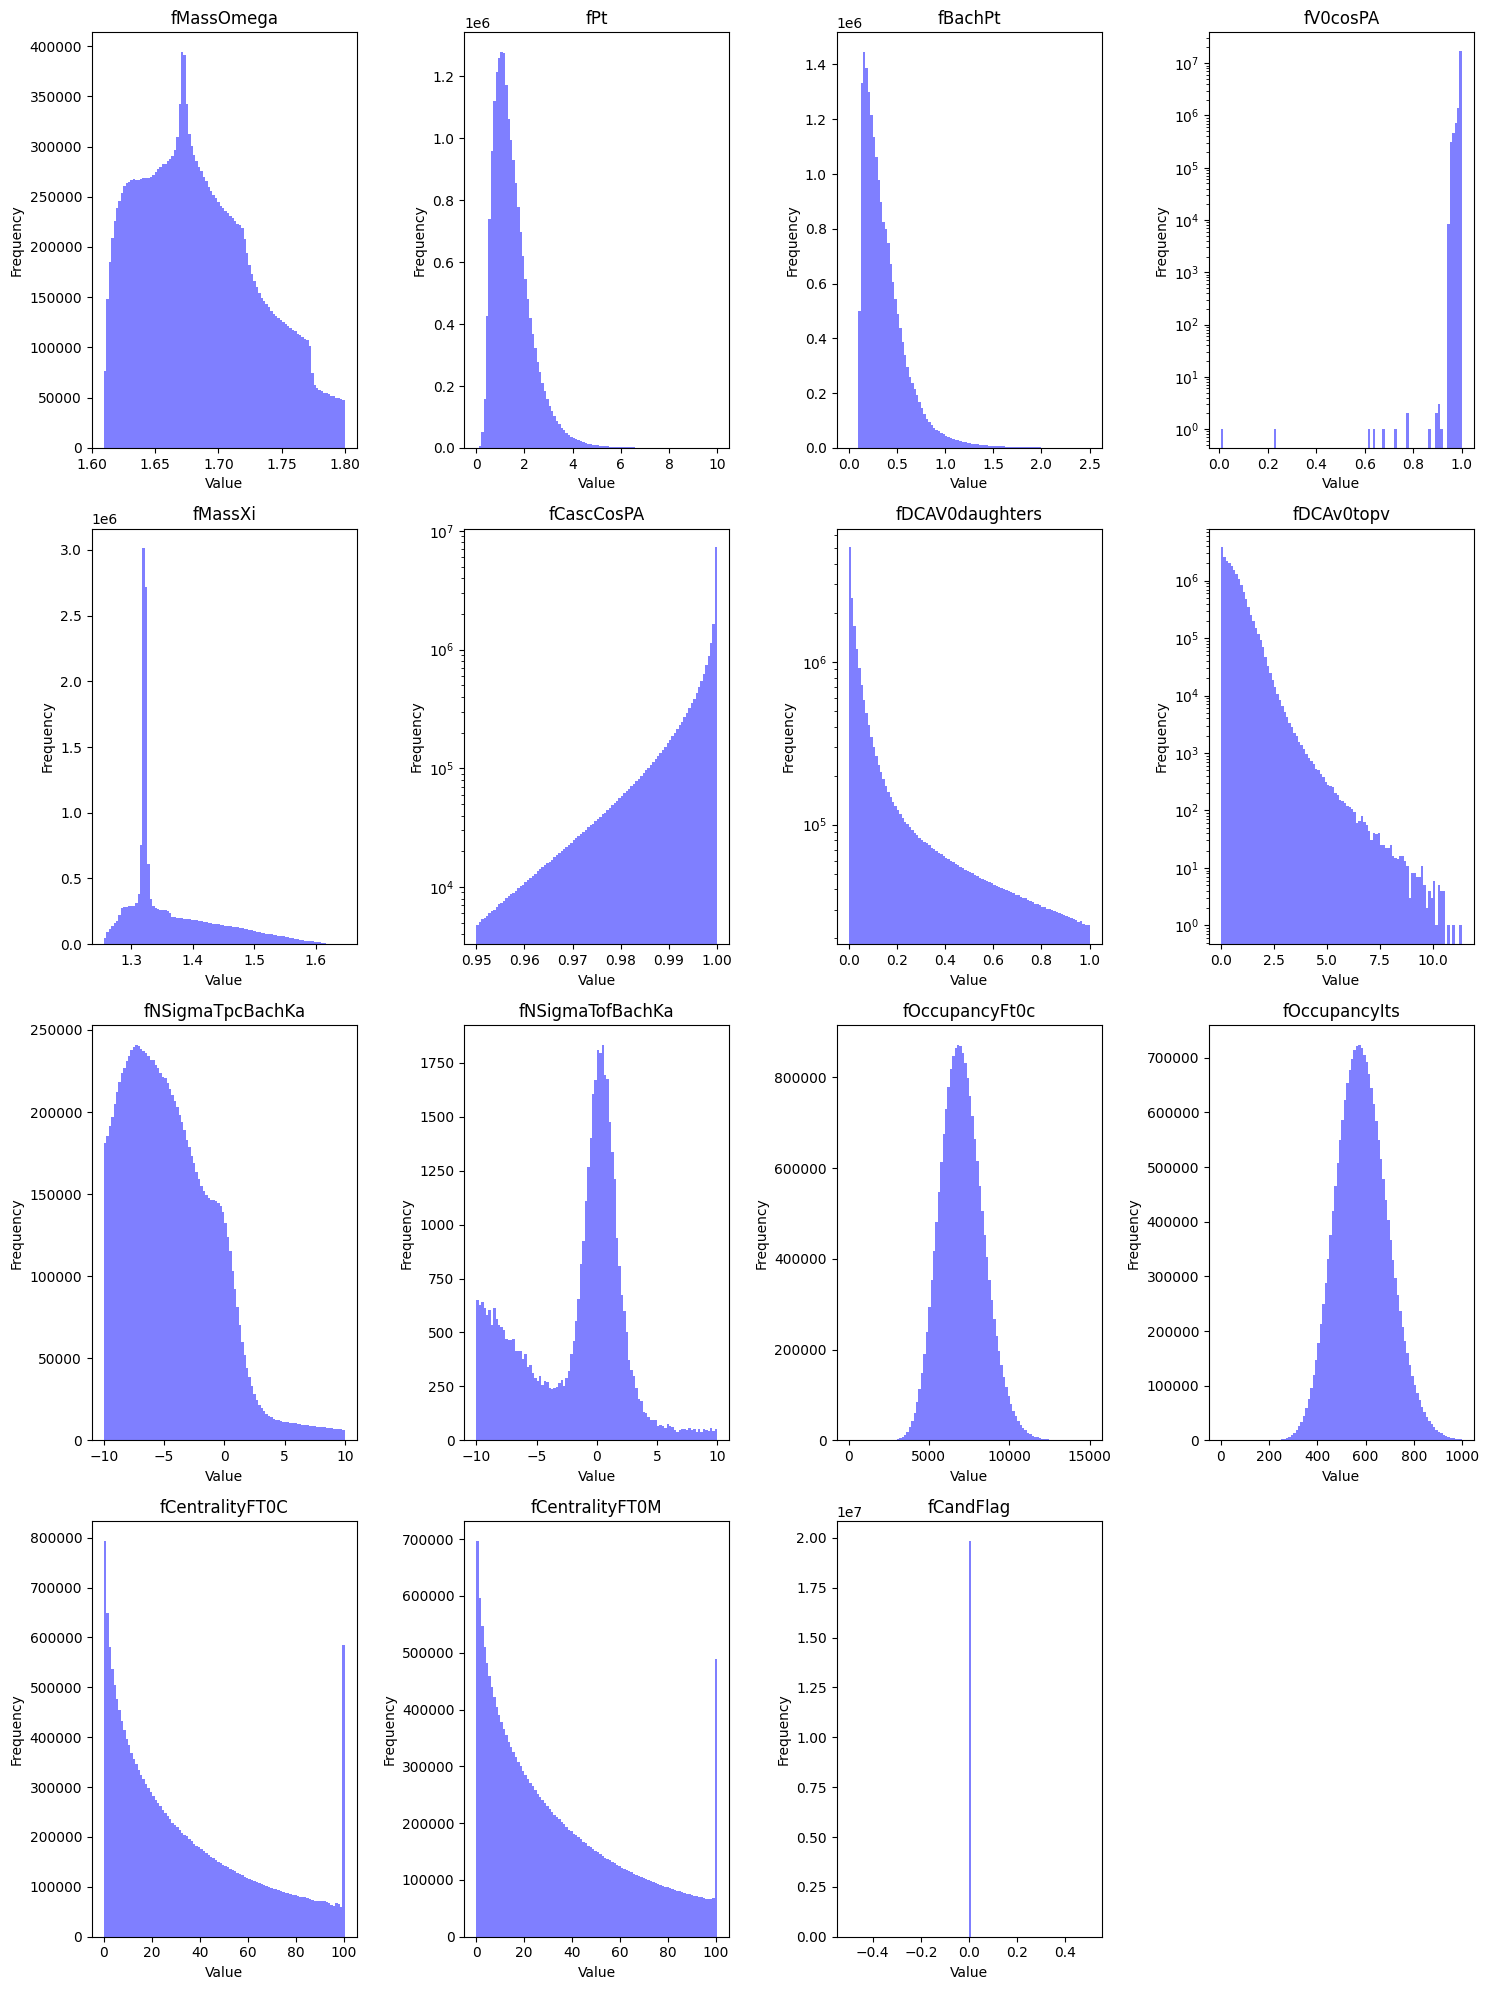

In [55]:
if df_data_pp != "": 
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_data_pp.columns):
        axes[i].hist(merged_df_data_pp[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, color='blue')
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')
    
    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

In [67]:
if df_data_pp != "": 
    sel_merged_df_data_pp = merged_df_data_pp.query("(fMassXi < 1.30 or fMassXi > 1.35) and fCascCosPA > 0.9999 and fDCAV0daughters < 0.05 and fDCAv0topv > 0.02 and fDCAv0topv < 1")
    print(f"[bef. sel.] Number of dataframe entries: {len(merged_df_data_pp)}")
    print(f"[aft. sel.] Number of dataframe entries: {len(sel_merged_df_data_pp)}")
    print(f"Dataframe columns: {sel_merged_df_data_pp.columns}")

[bef. sel.] Number of dataframe entries: 19853617
[aft. sel.] Number of dataframe entries: 285215
Dataframe columns: Index(['fMassOmega', 'fPt', 'fBachPt', 'fV0cosPA', 'fMassXi', 'fCascCosPA',
       'fDCAV0daughters', 'fDCAv0topv', 'fNSigmaTpcBachKa', 'fNSigmaTofBachKa',
       'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C', 'fCentralityFT0M',
       'fCandFlag'],
      dtype='object')


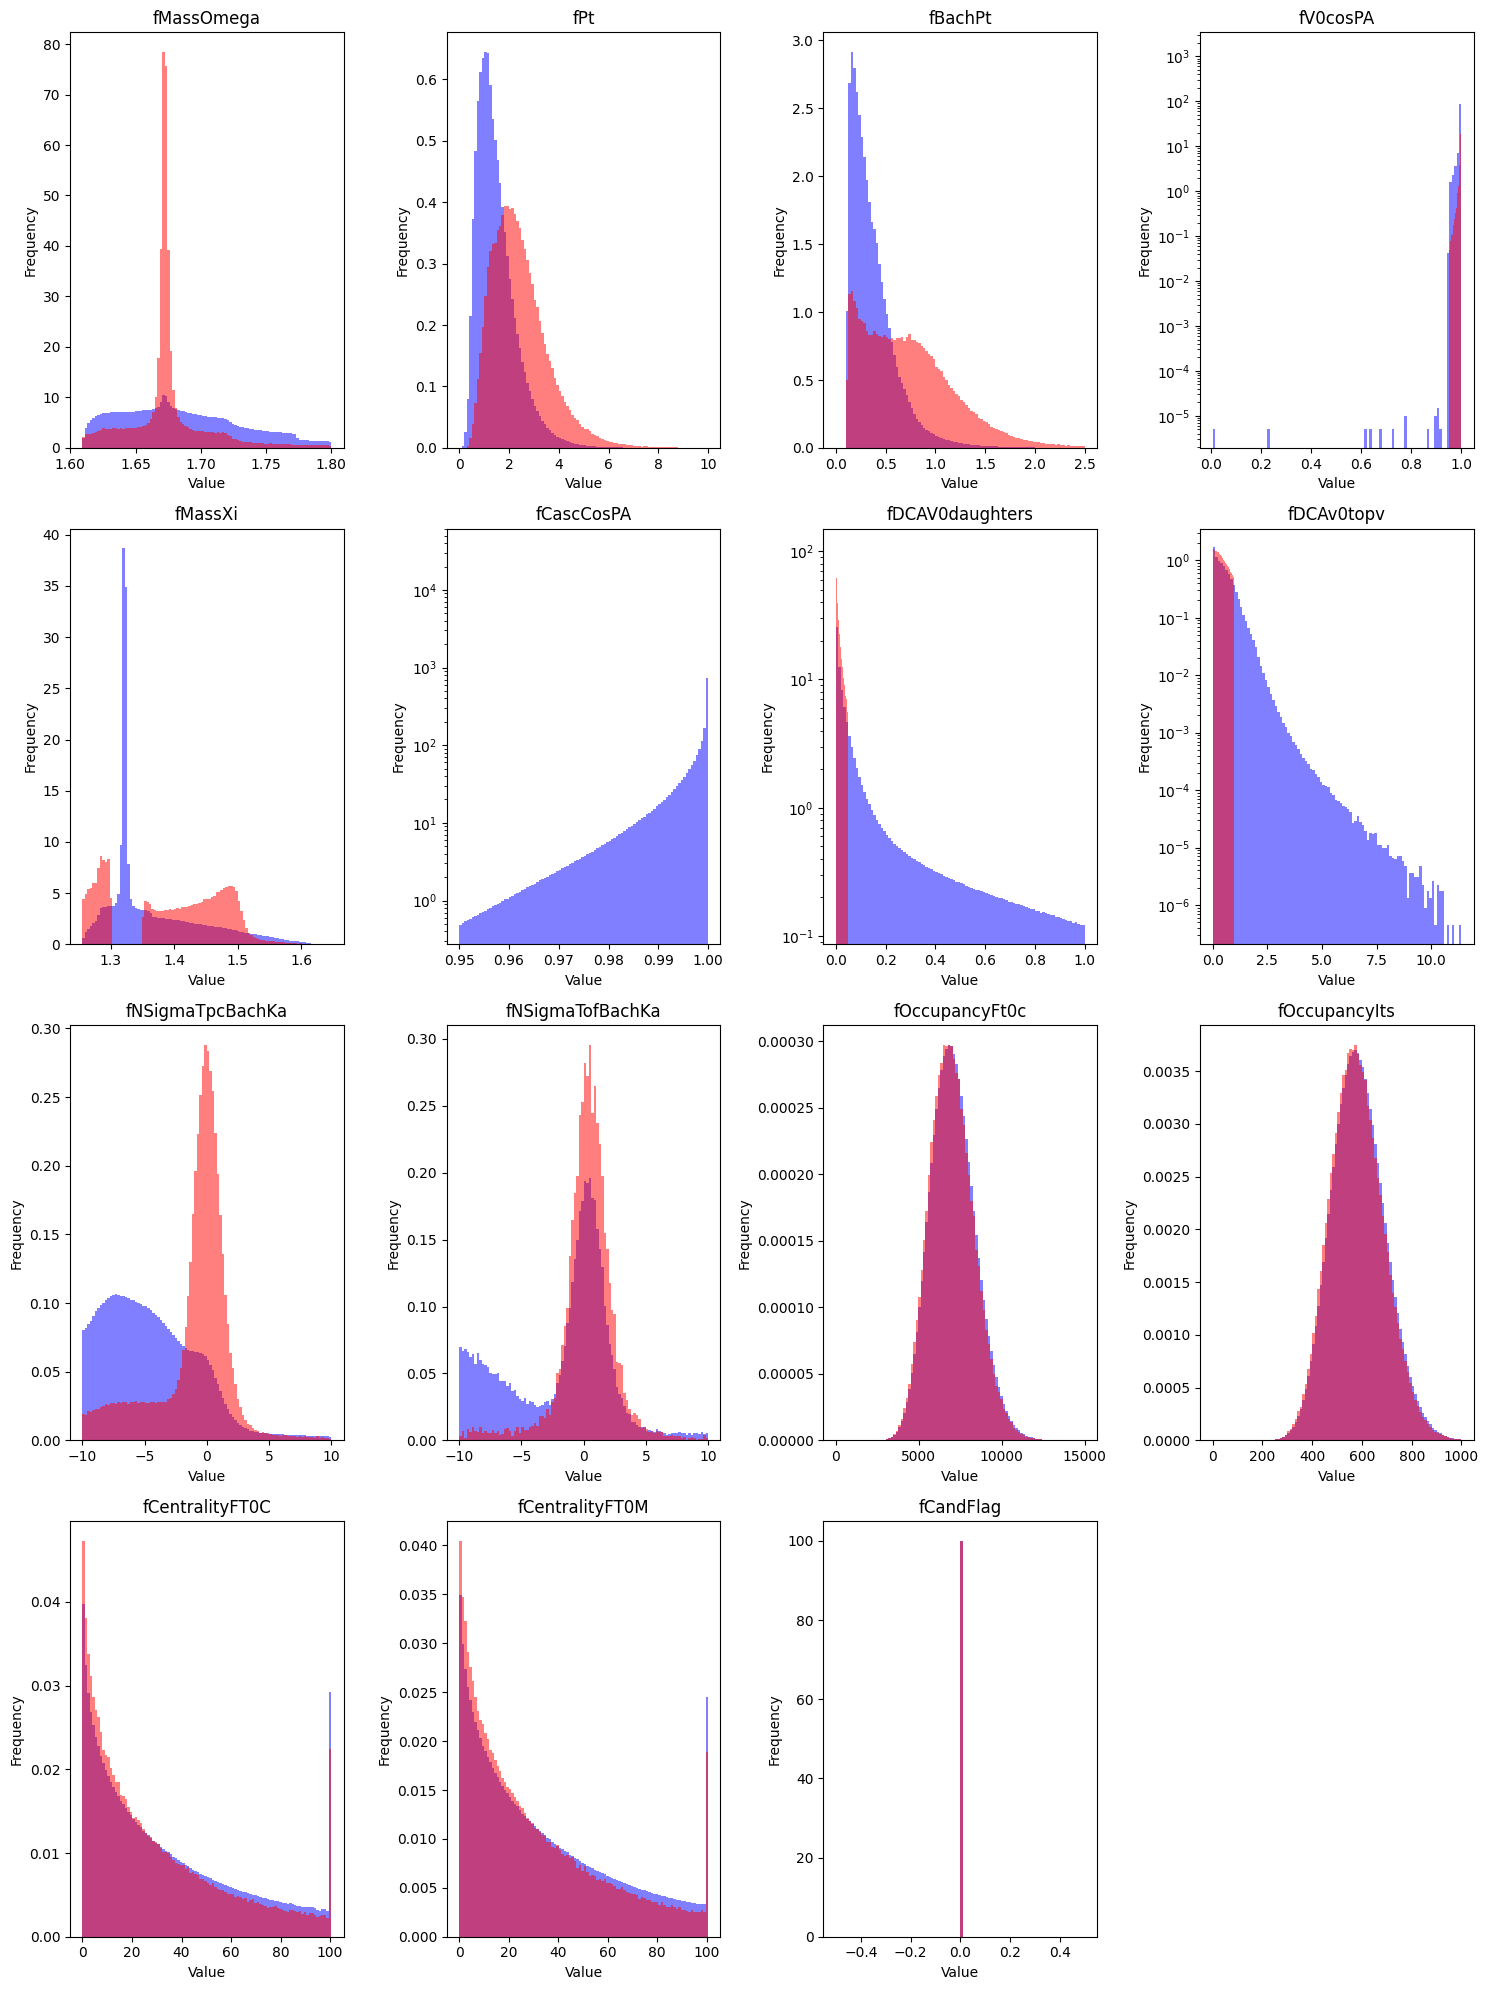

In [68]:
if df_data_pp != "": 
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_data_pp.columns):
        axes[i].hist(merged_df_data_pp[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", color='blue', density=True)
        axes[i].hist(sel_merged_df_data_pp[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", color='red', density=True)
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')

    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### PbPb

In [94]:
if df_data_pbpb != "":
    dfs_data_pbpb = []
    with uproot.open(df_data_pbpb) as f:
        print(f.keys())
        for iKey, key in enumerate(f.keys()):
            if 'pidcascades' in key:
                print(key)
                dfData = f[key].arrays(library='pd')
                dfs_data_pbpb.append(dfData)

    merged_df_data_pbpb = pd.concat([df for df in dfs_data_pbpb], ignore_index=True)
    print(f"Number of dataframe entries: {len(merged_df_data_pbpb)}")
    print(f"Dataframe columns: {merged_df_data_pbpb.columns}")

['DF_2336960464275104;1', 'DF_2336960464275104/O2pidcascades;1', 'DF_2336986335323680;1', 'DF_2336986335323680/O2pidcascades;1', 'DF_2336986337531168;1', 'DF_2336986337531168/O2pidcascades;1', 'DF_2336986341822784;1', 'DF_2336986341822784/O2pidcascades;1', 'DF_2336986343152928;1', 'DF_2336986343152928/O2pidcascades;1', 'DF_2336986347406048;1', 'DF_2336986347406048/O2pidcascades;1', 'DF_2336986352356672;1', 'DF_2336986352356672/O2pidcascades;1', 'DF_2336986357137952;1', 'DF_2336986357137952/O2pidcascades;1', 'DF_2336986361843840;1', 'DF_2336986361843840/O2pidcascades;1']
DF_2336960464275104/O2pidcascades;1
DF_2336986335323680/O2pidcascades;1
DF_2336986337531168/O2pidcascades;1
DF_2336986341822784/O2pidcascades;1
DF_2336986343152928/O2pidcascades;1
DF_2336986347406048/O2pidcascades;1
DF_2336986352356672/O2pidcascades;1
DF_2336986357137952/O2pidcascades;1
DF_2336986361843840/O2pidcascades;1
Number of dataframe entries: 18962842
Dataframe columns: Index(['fMassOmega', 'fPt', 'fBachPt', 'fV

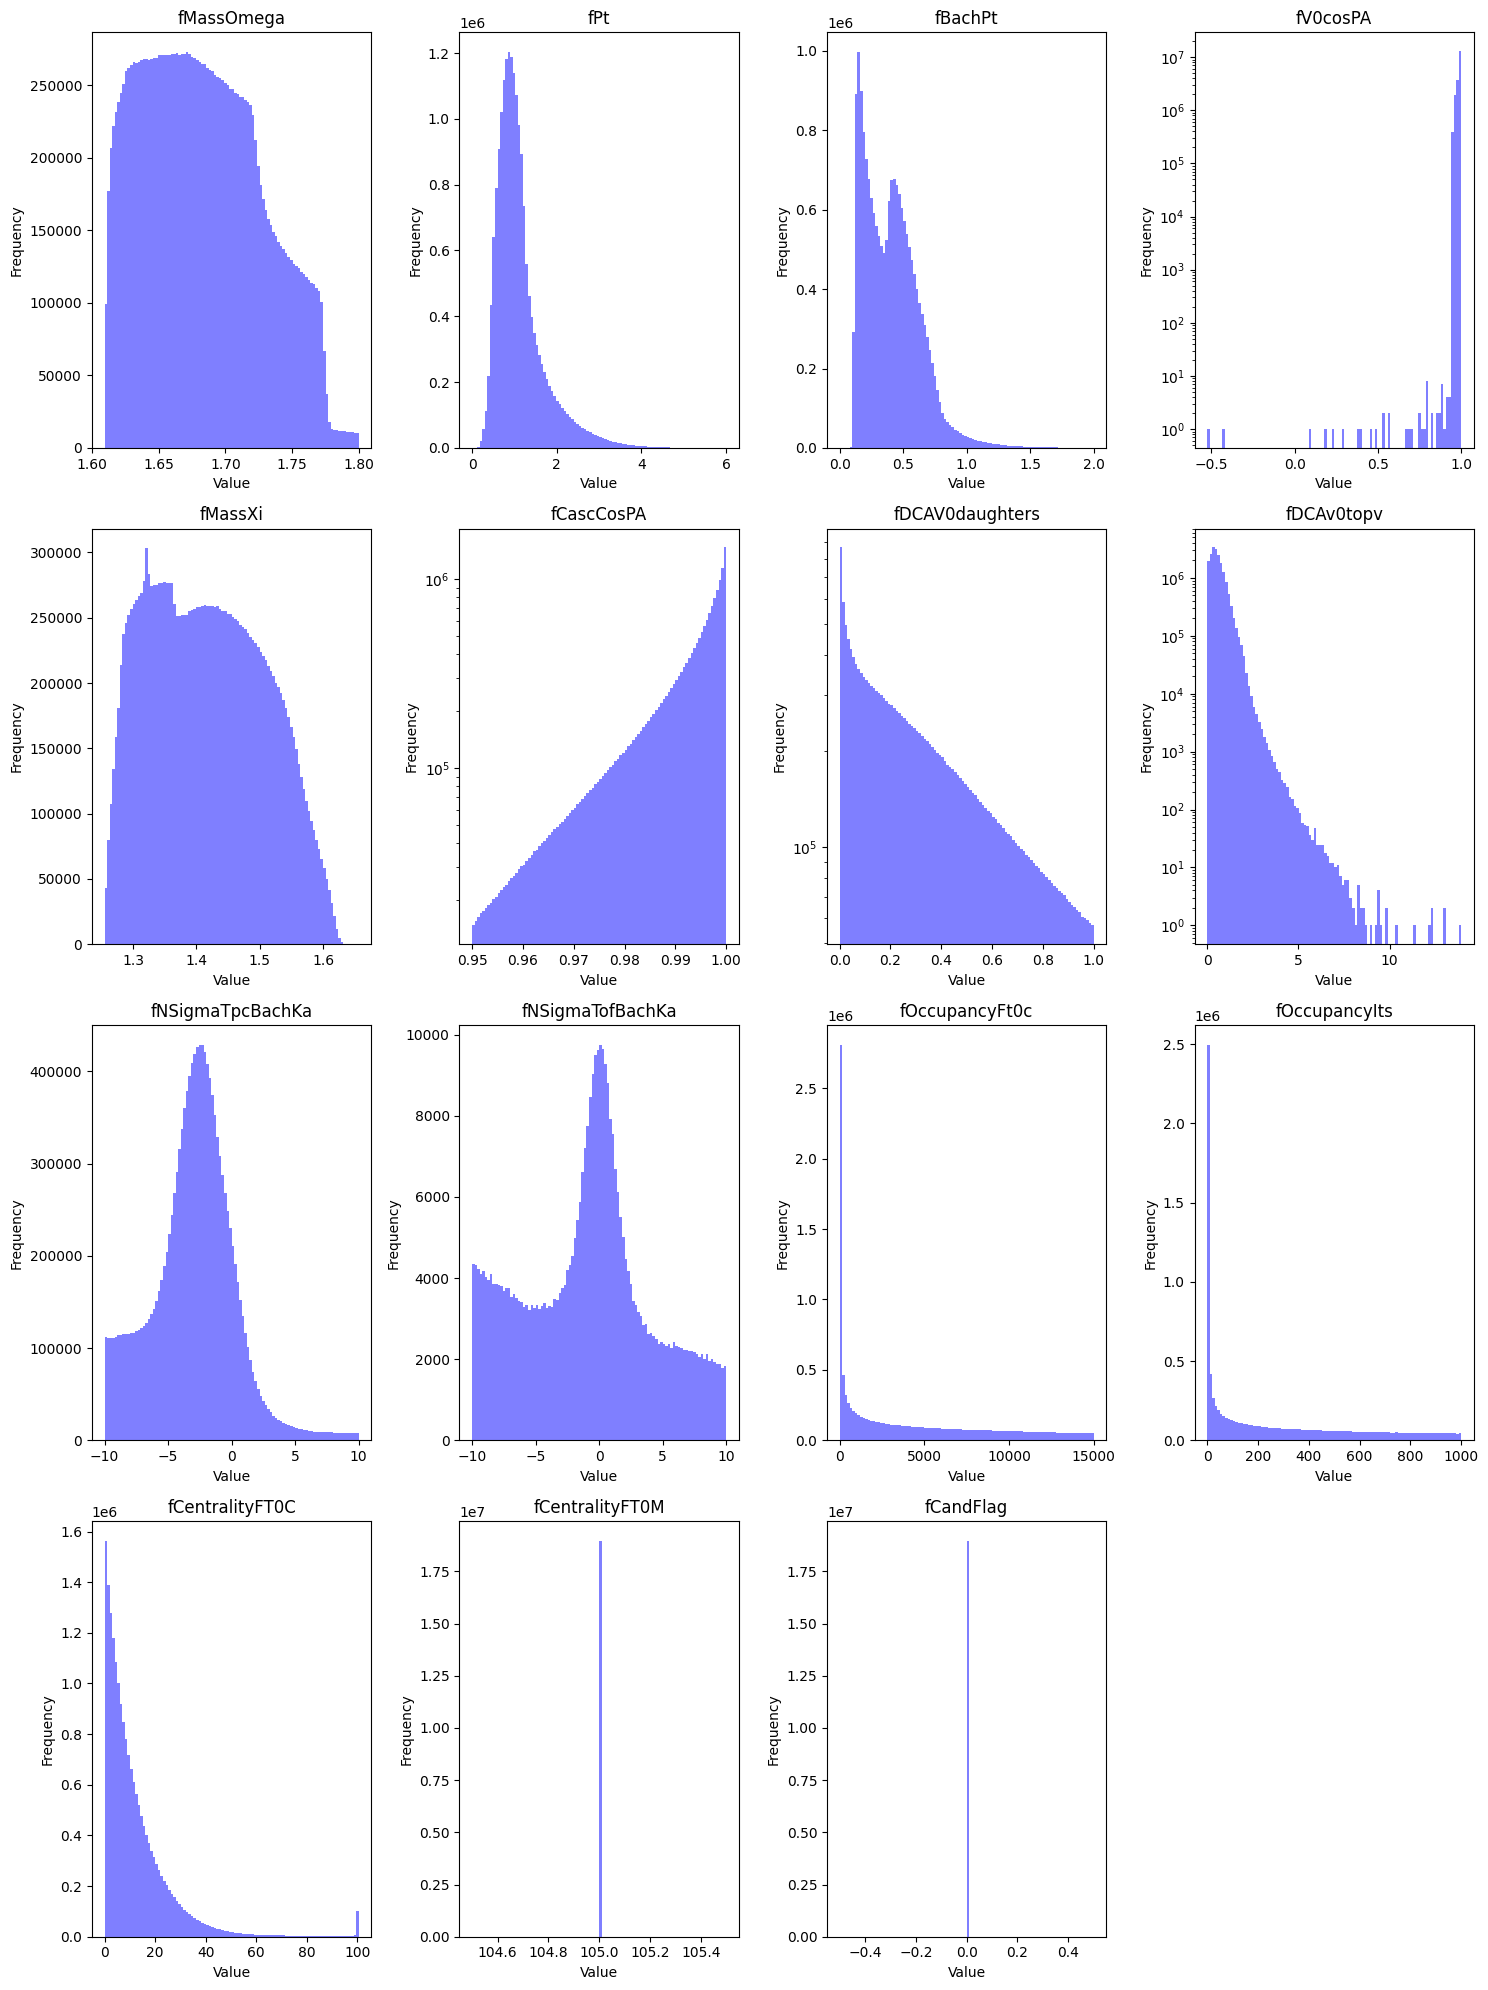

In [95]:
if df_data_pbpb != "":
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_data_pbpb.columns):
        axes[i].hist(merged_df_data_pbpb[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, color='blue')
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')
    
    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

In [96]:
if df_data_pbpb != "":
    sel_merged_df_data_pbpb = merged_df_data_pbpb.query("(fMassXi < 1.30 or fMassXi > 1.35) and fCascCosPA > 0.999 and fDCAV0daughters < 0.05 and fDCAv0topv > 0.02 and fDCAv0topv < 1")
    print(f"[bef. sel.] Number of dataframe entries: {len(merged_df_data_pbpb)}")
    print(f"[aft. sel.] Number of dataframe entries: {len(sel_merged_df_data_pbpb)}")
    print(f"Dataframe columns: {sel_merged_df_data_pbpb.columns}")

[bef. sel.] Number of dataframe entries: 18962842
[aft. sel.] Number of dataframe entries: 247508
Dataframe columns: Index(['fMassOmega', 'fPt', 'fBachPt', 'fV0cosPA', 'fMassXi', 'fCascCosPA',
       'fDCAV0daughters', 'fDCAv0topv', 'fNSigmaTpcBachKa', 'fNSigmaTofBachKa',
       'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C', 'fCentralityFT0M',
       'fCandFlag'],
      dtype='object')


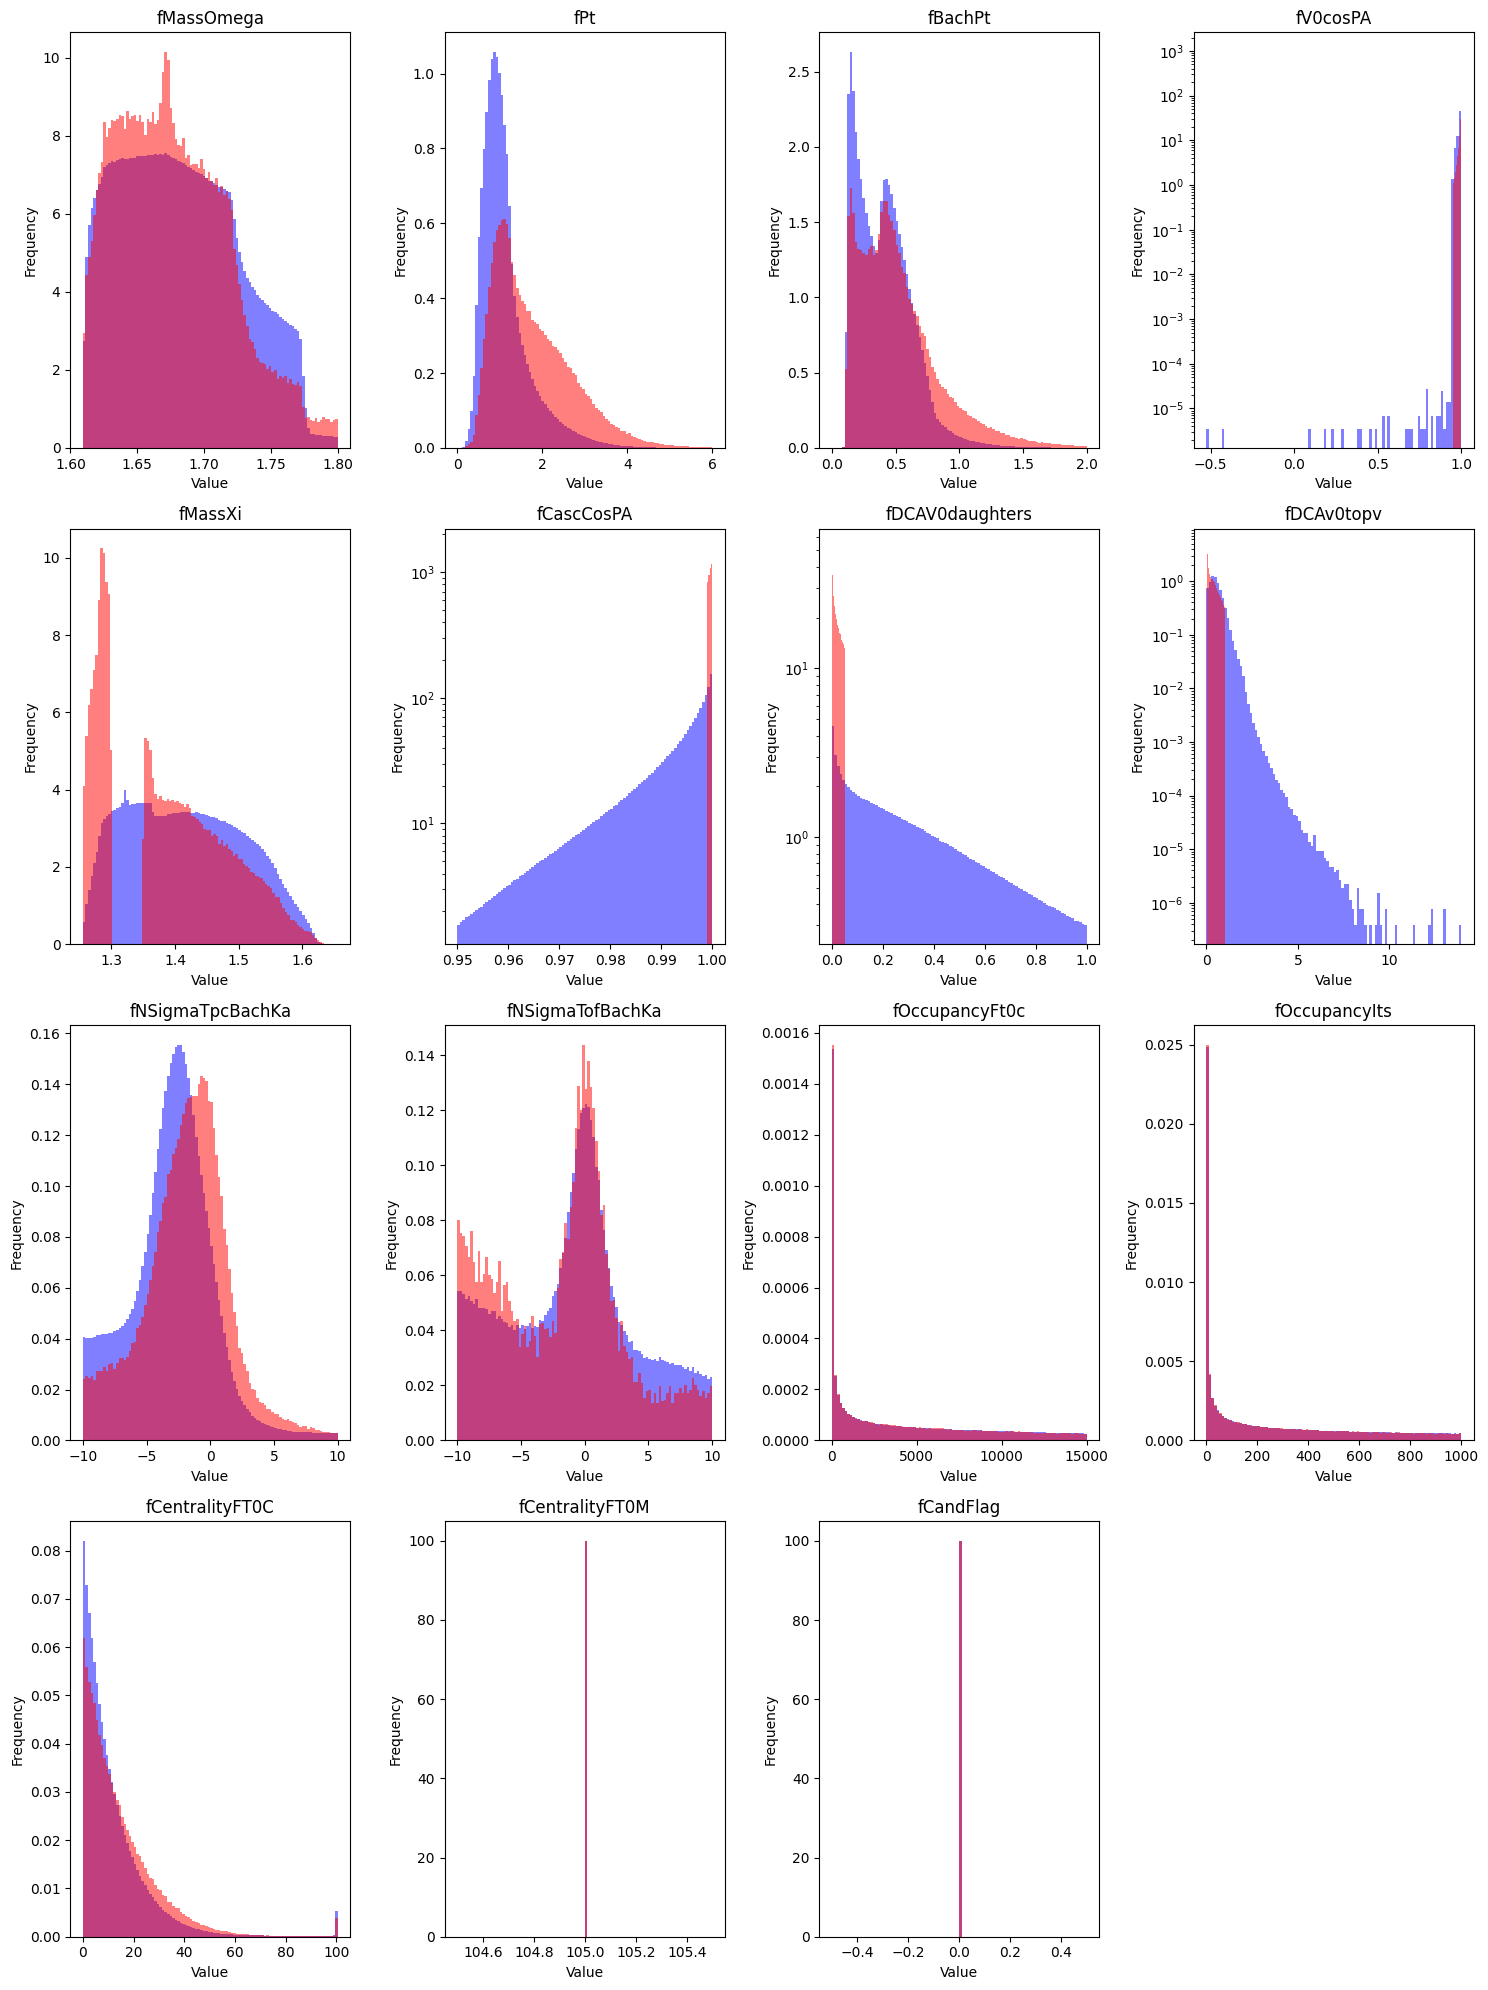

In [97]:
if df_data_pbpb != "":
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_data_pbpb.columns):
        axes[i].hist(merged_df_data_pbpb[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", color='blue', density=True)
        axes[i].hist(sel_merged_df_data_pbpb[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", color='red', density=True)
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')
    
    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

# MC

### pp

In [42]:
if df_mc_pp != "": 
    dfs_mc_pp = []
    with uproot.open(df_mc_pp) as f:
        print(f.keys())
        for iKey, key in enumerate(f.keys()):
            if 'pidcascades' in key:
                print(key)
                dfData = f[key].arrays(library='pd')
                dfs_mc_pp.append(dfData)

    merged_df_mc_pp = pd.concat([df for df in dfs_mc_pp], ignore_index=True)
    print(f"Number of dataframe entries: {len(merged_df_mc_pp)}")
    print(f"Dataframe columns: {merged_df_mc_pp.columns}")

['DF_2263915935223416;1', 'DF_2263915935223416/O2pidcascades;1']
DF_2263915935223416/O2pidcascades;1
Number of dataframe entries: 49379
Dataframe columns: Index(['fMassOmega', 'fPt', 'fBachPt', 'fV0cosPA', 'fMassXi', 'fCascCosPA',
       'fDCAV0daughters', 'fDCAv0topv', 'fNSigmaTpcBachKa', 'fNSigmaTofBachKa',
       'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C', 'fCentralityFT0M',
       'fCandFlag'],
      dtype='object')


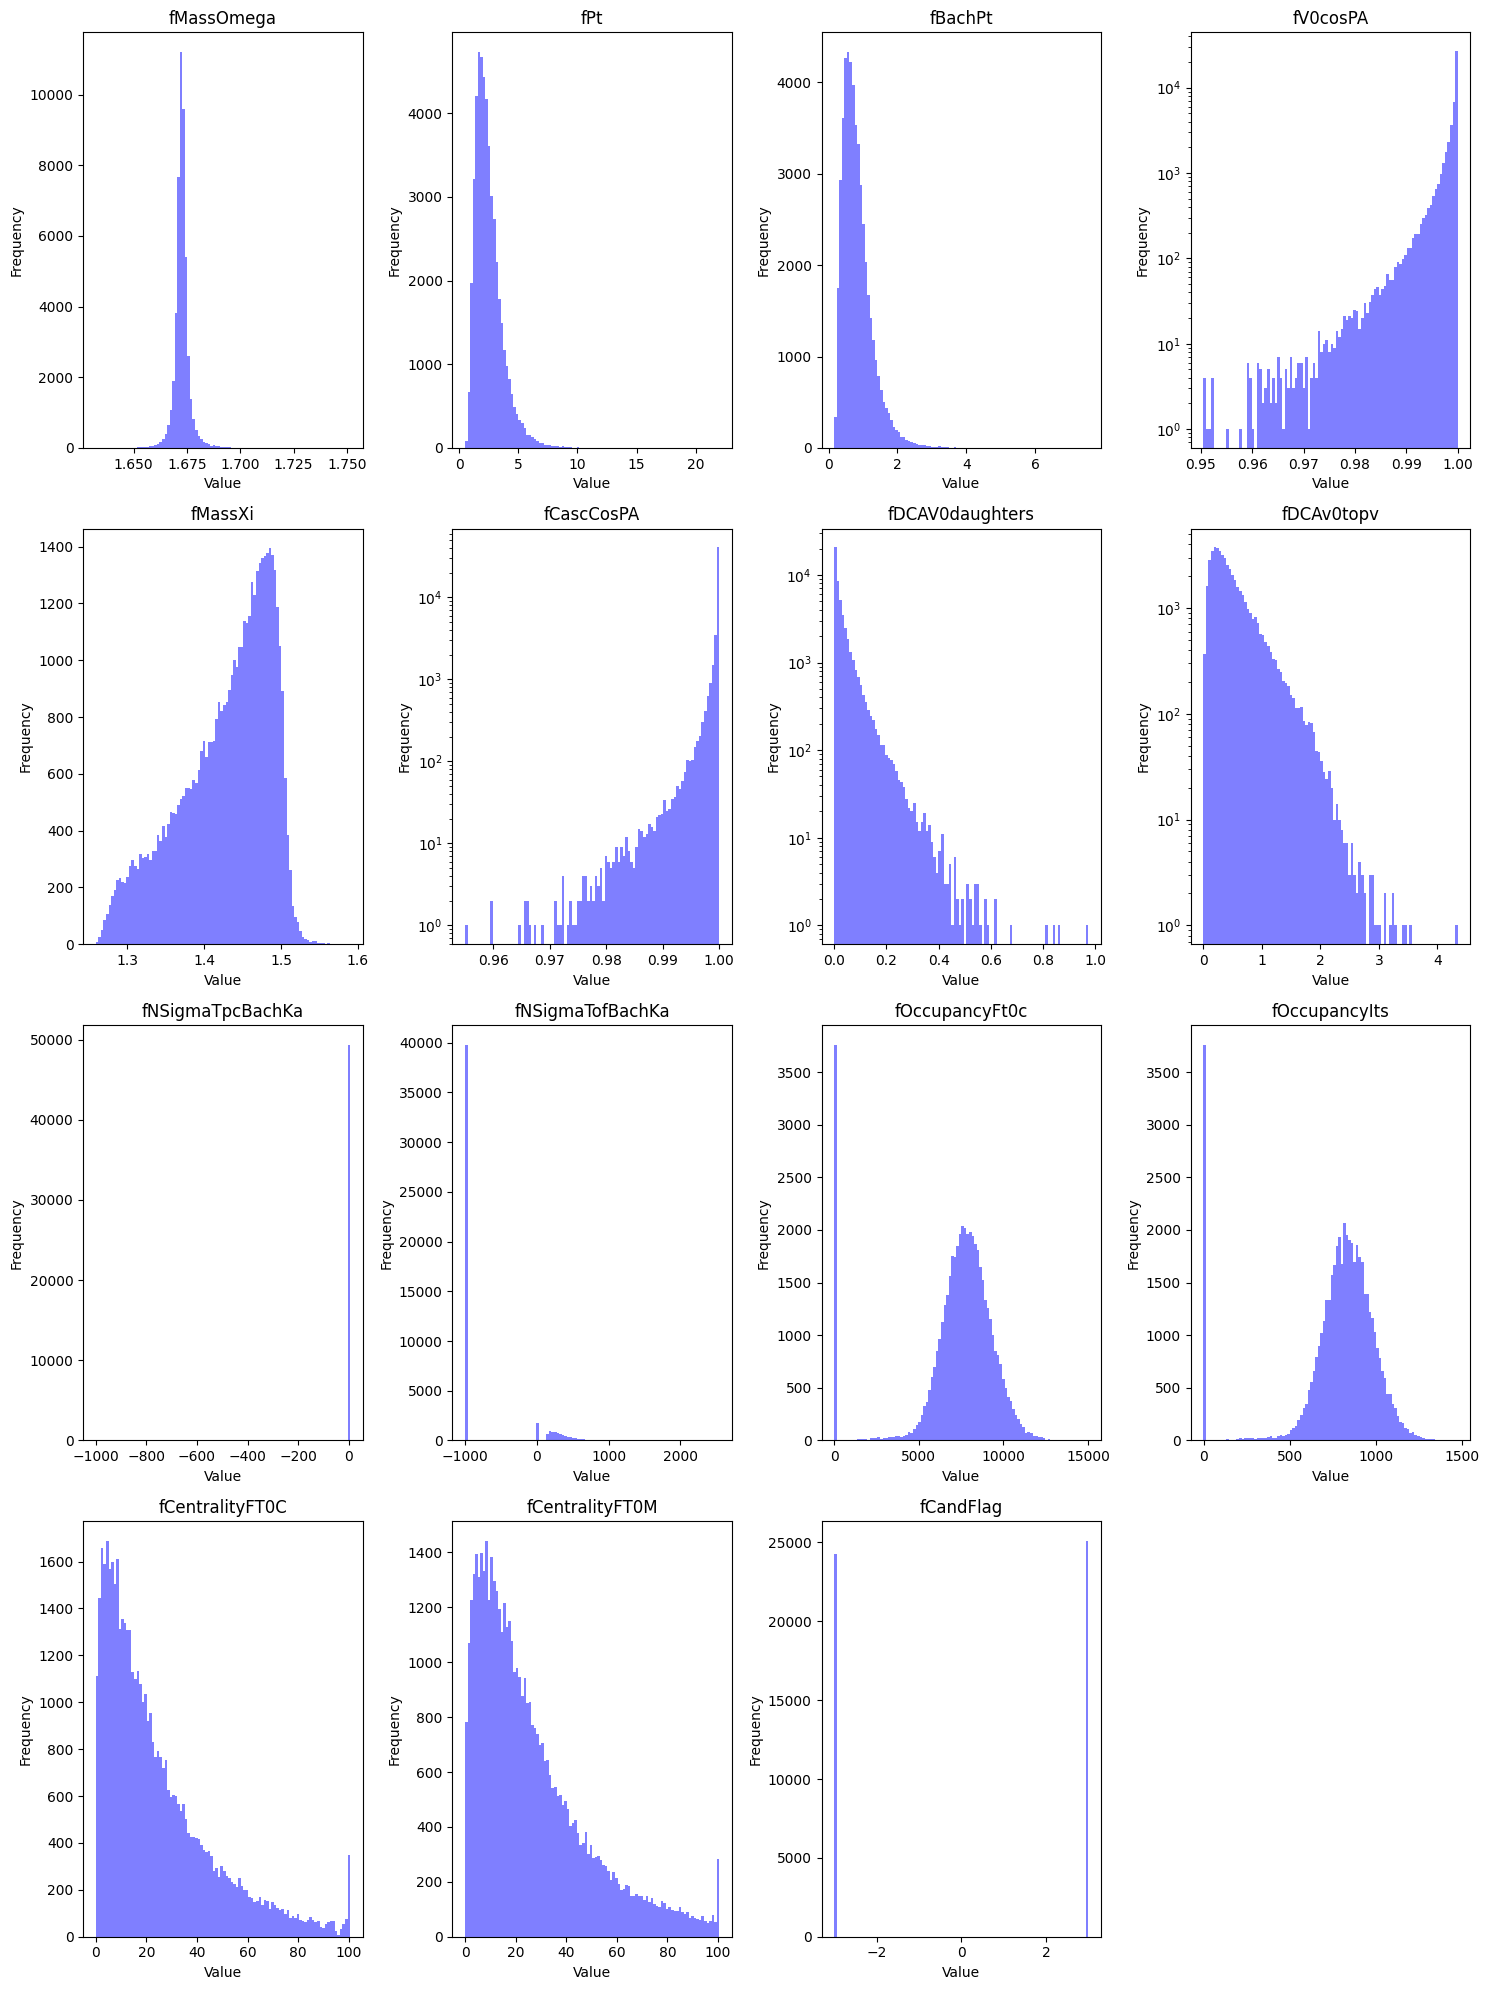

In [43]:
if df_mc_pp != "":
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_mc_pp.columns):
        axes[i].hist(merged_df_mc_pp[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, color='blue')
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')

    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

In [44]:
# Since the Omega is the only cascade which we are checking,
# the casc table is filled only with them and there is no
# need to query on fCandFlag
if df_mc_pp != "": 
    sel_merged_df_mc_pp = merged_df_mc_pp.query("fCandFlag == 3 or fCandFlag == -3")
    print(f"[bef. sel.] Number of dataframe entries: {len(merged_df_mc_pp)}")
    print(f"[aft. sel.] Number of dataframe entries: {len(sel_merged_df_mc_pp)}")
    print(f"Dataframe columns: {sel_merged_df_mc_pp.columns}")

[bef. sel.] Number of dataframe entries: 49379
[aft. sel.] Number of dataframe entries: 49379
Dataframe columns: Index(['fMassOmega', 'fPt', 'fBachPt', 'fV0cosPA', 'fMassXi', 'fCascCosPA',
       'fDCAV0daughters', 'fDCAv0topv', 'fNSigmaTpcBachKa', 'fNSigmaTofBachKa',
       'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C', 'fCentralityFT0M',
       'fCandFlag'],
      dtype='object')


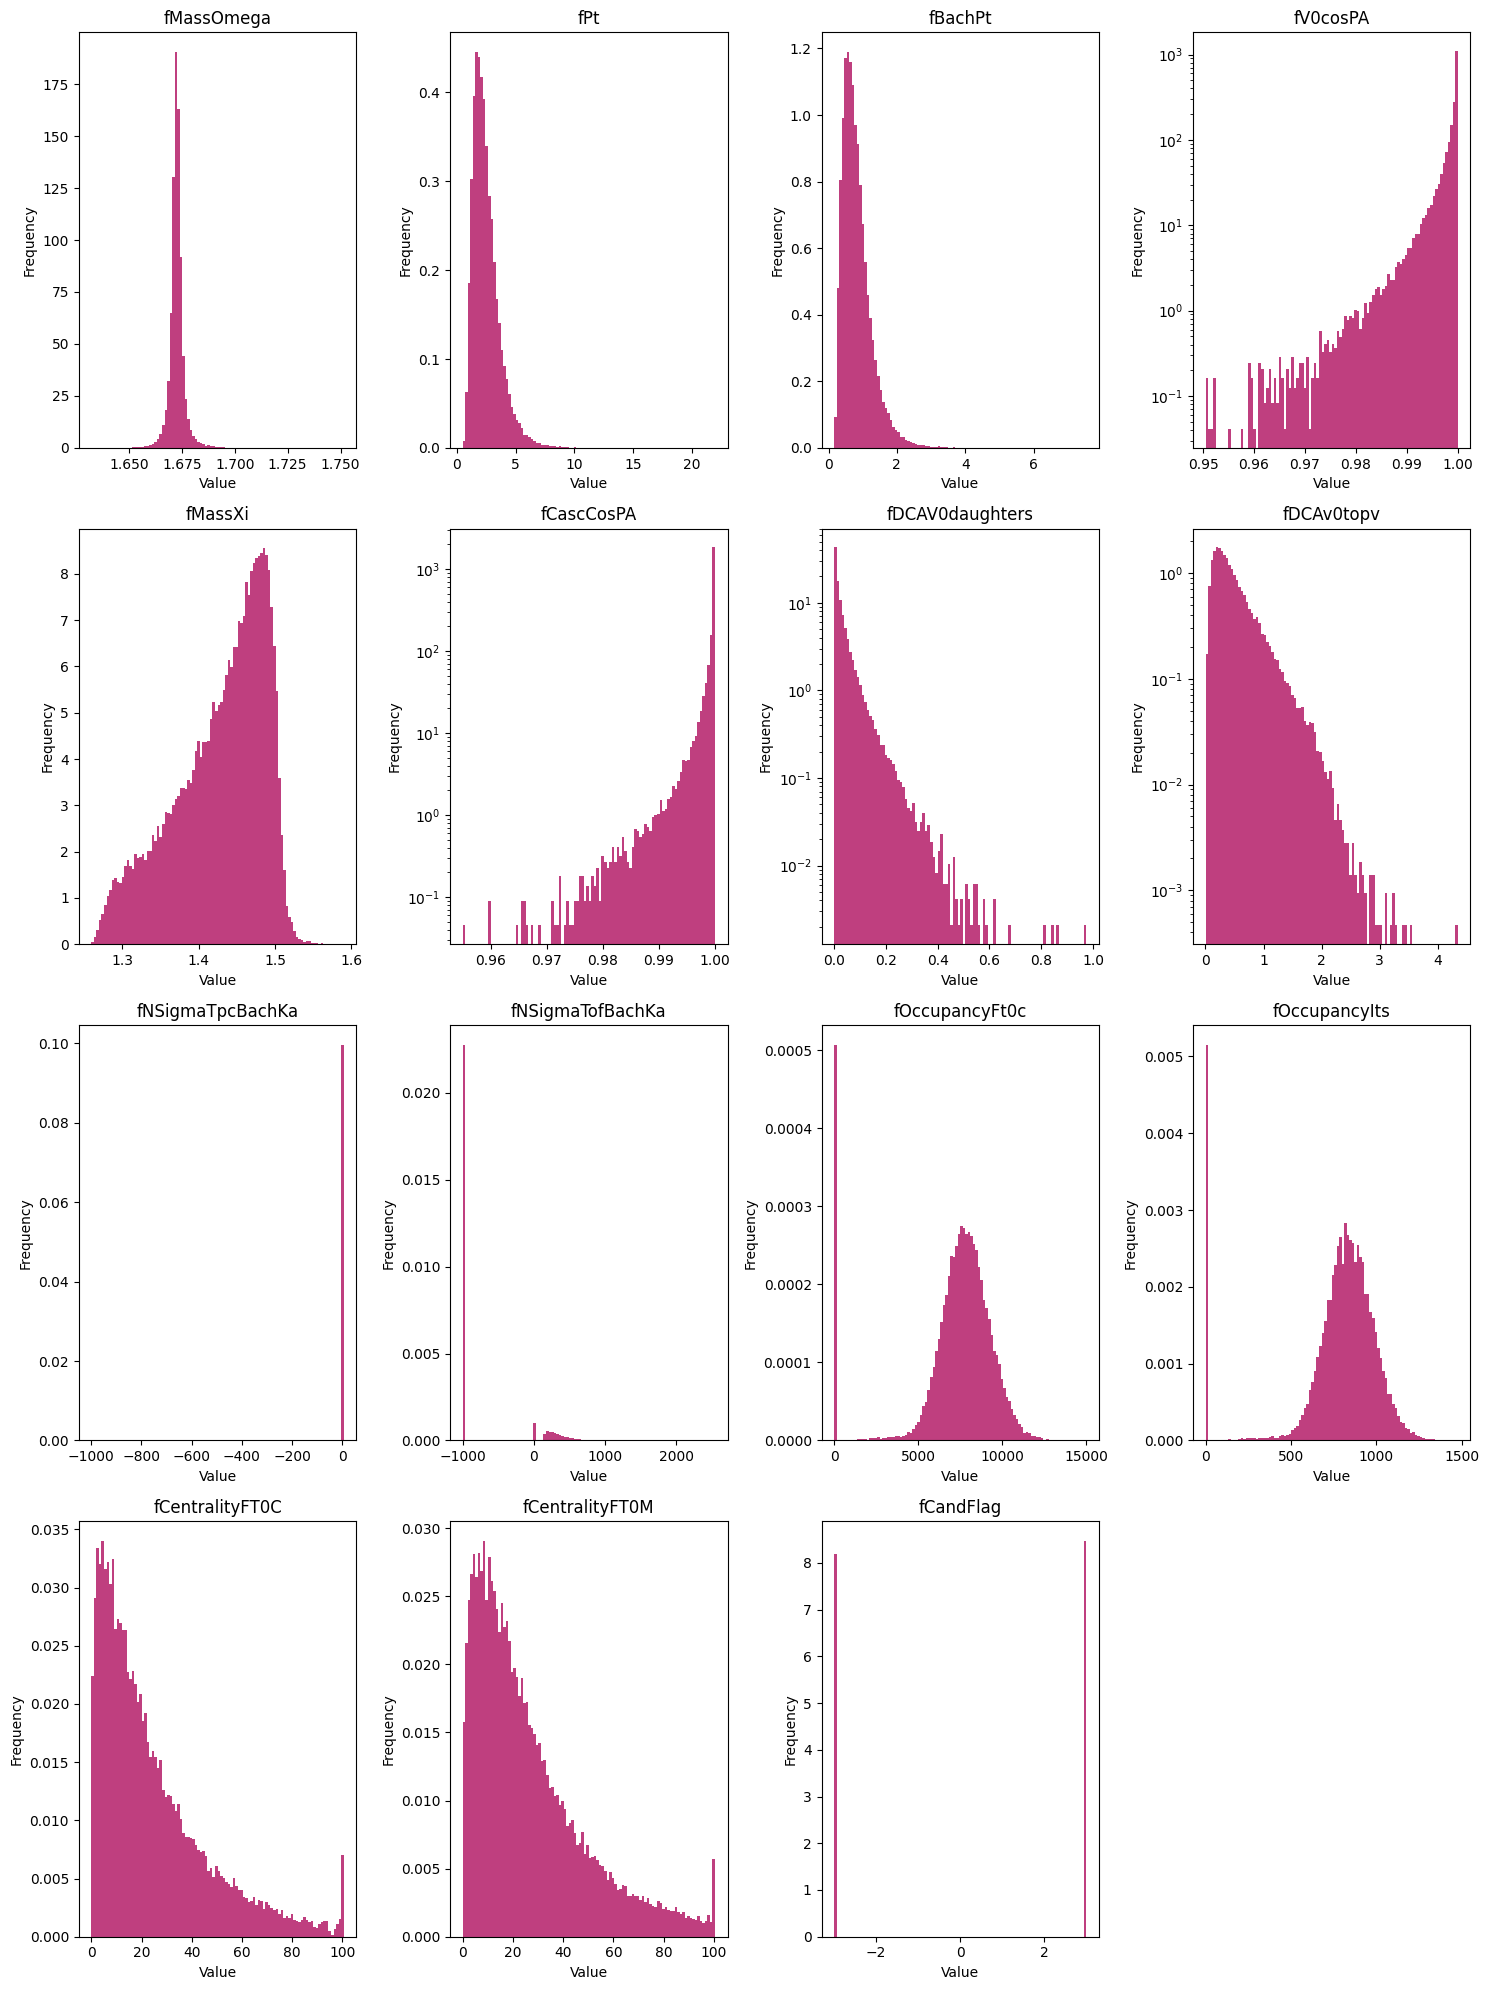

In [45]:
if df_mc_pp != "":
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_mc_pp.columns):
        axes[i].hist(merged_df_mc_pp[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", color='blue', density=True)
        axes[i].hist(sel_merged_df_mc_pp[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", color='red', density=True)
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')

    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### PbPb

In [7]:
if df_mc_pbpb != "": 
    dfs_mc_pbpb = []
    with uproot.open(df_mc_pbpb) as f:
        print(f.keys())
        for iKey, key in enumerate(f.keys()):
            if 'pidcascades' in key:
                print(key)
                dfData = f[key].arrays(library='pd')
                dfs_mc_pbpb.append(dfData)

    merged_df_mc_pbpb = pd.concat([df for df in dfs_mc_pbpb], ignore_index=True)
    print(f"Number of dataframe entries: {len(merged_df_mc_pbpb)}")
    print(f"Dataframe columns: {merged_df_mc_pbpb.columns}")

['DF_2336986331393818;1', 'DF_2336986331393818/O2pidcascades;1']
DF_2336986331393818/O2pidcascades;1
Number of dataframe entries: 142
Dataframe columns: Index(['fMassOmega', 'fPt', 'fBachPt', 'fV0cosPA', 'fMassXi', 'fCascCosPA',
       'fDCAV0daughters', 'fDCAv0topv', 'fNSigmaTpcBachKa', 'fNSigmaTofBachKa',
       'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C', 'fCentralityFT0M',
       'fCandFlag'],
      dtype='object')


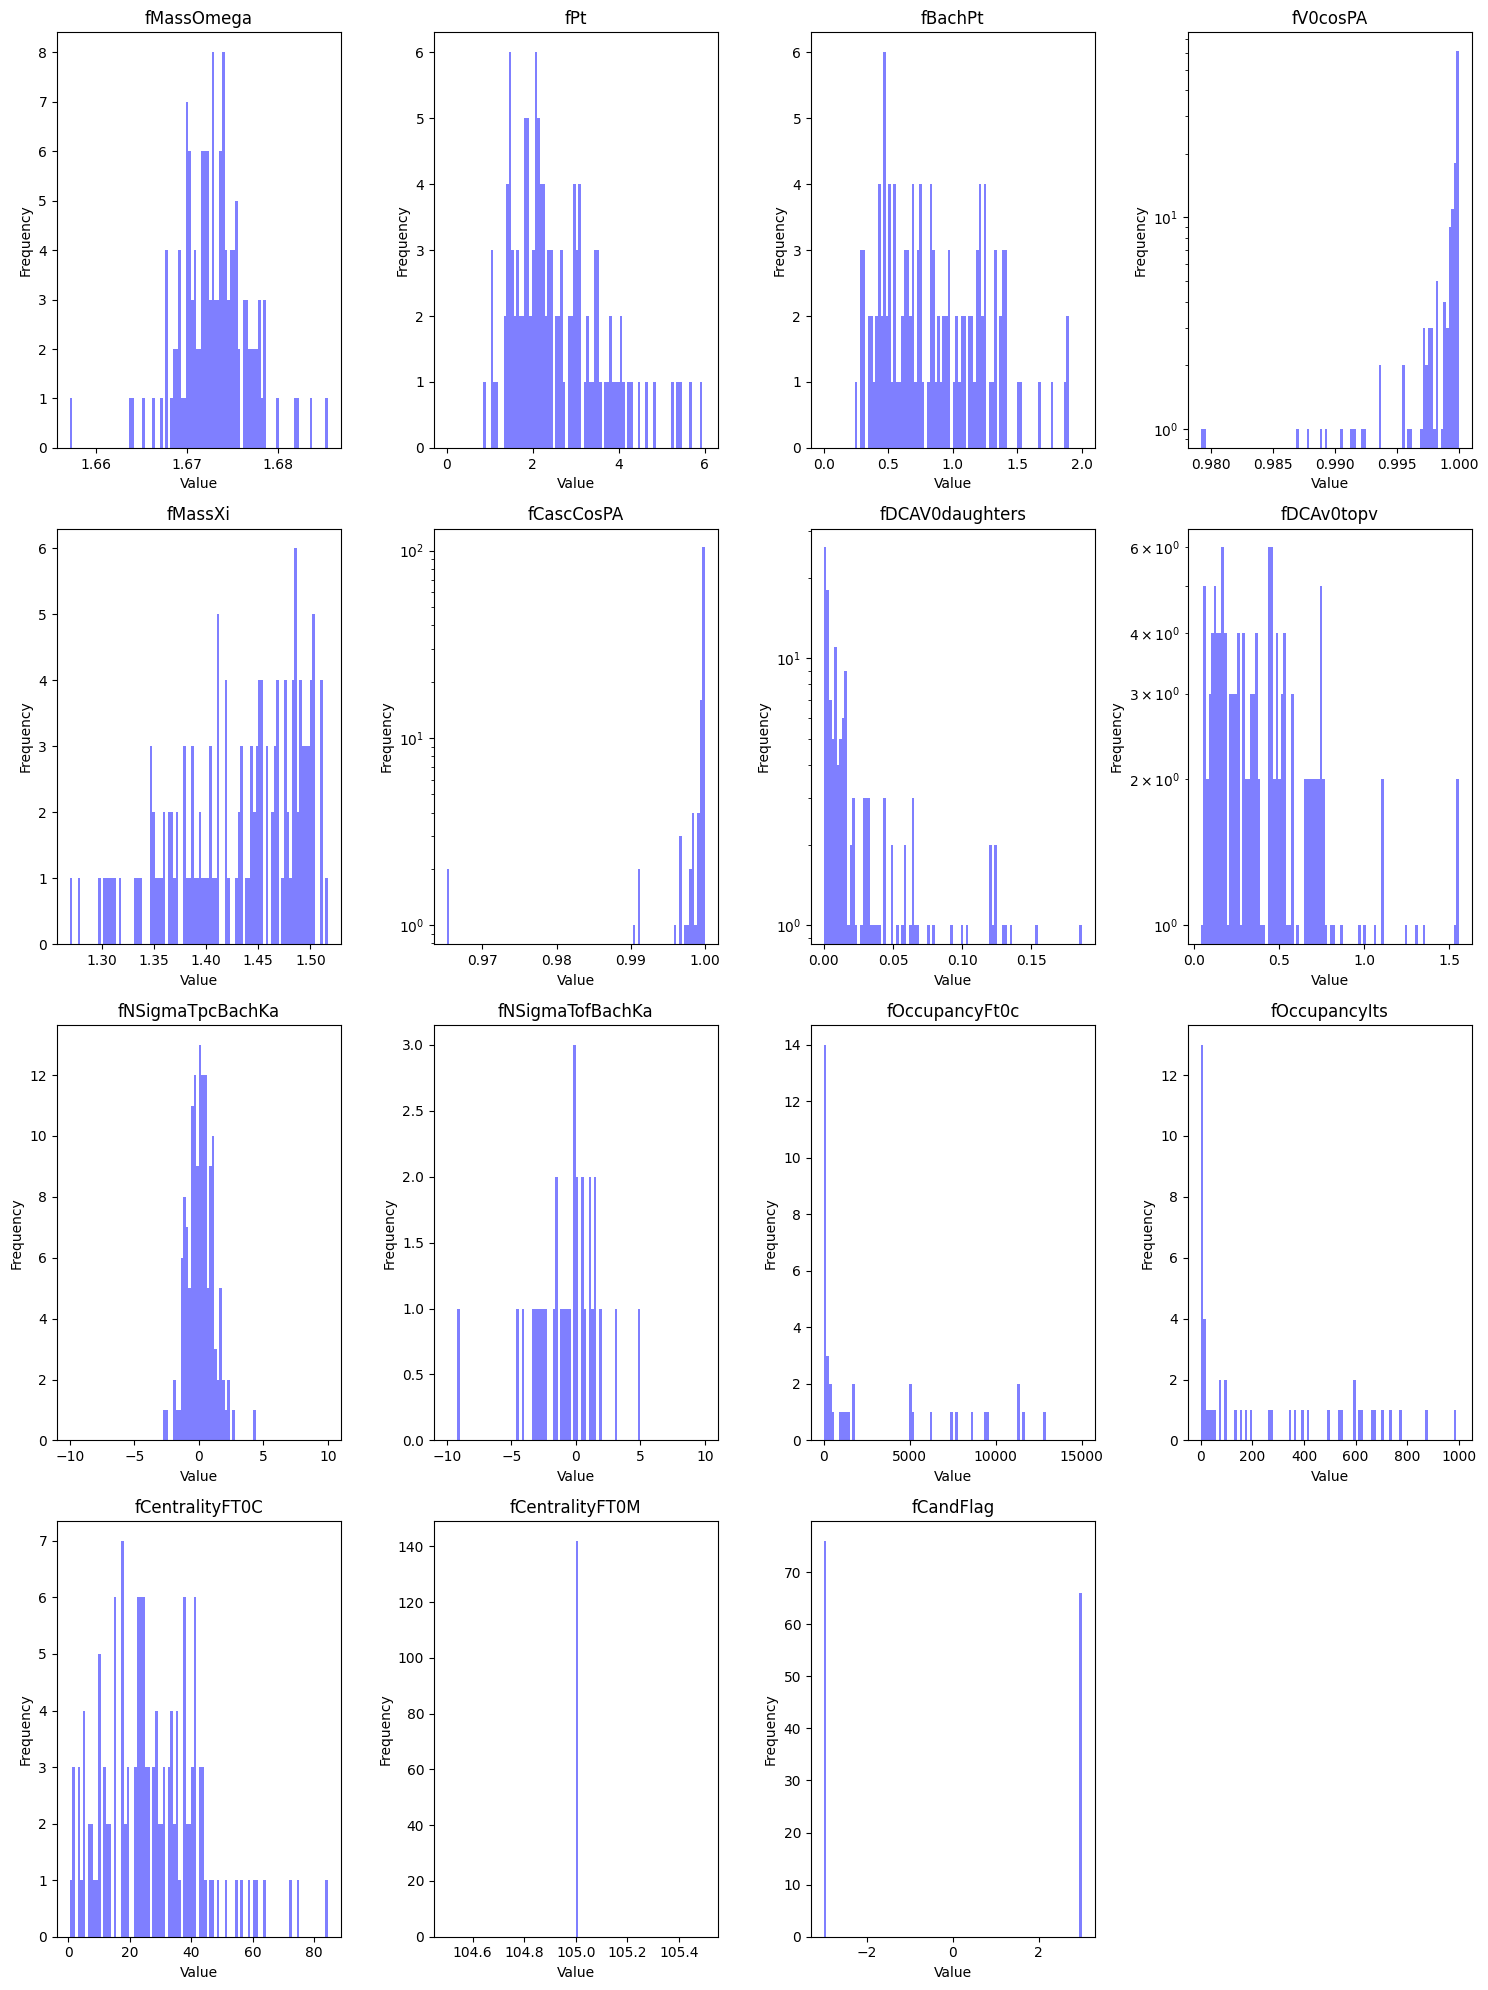

In [8]:
if df_mc_pbpb != "":
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_mc_pbpb.columns):
        axes[i].hist(merged_df_mc_pbpb[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, color='blue')
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')
    
    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

In [9]:
# Since the Omega is the only cascade which we are checking,
# the casc table is filled only with them and there is no
# need to query on fCandFlag
if df_mc_pbpb != "":
    sel_merged_df_mc_pbpb = merged_df_mc_pbpb.query("fCandFlag == 3 or fCandFlag == -3")
    print(f"[bef. sel.] Number of dataframe entries: {len(merged_df_mc_pbpb)}")
    print(f"[aft. sel.] Number of dataframe entries: {len(sel_merged_df_mc_pbpb)}")
    print(f"Dataframe columns: {sel_merged_df_mc_pbpb.columns}")

[bef. sel.] Number of dataframe entries: 142
[aft. sel.] Number of dataframe entries: 142
Dataframe columns: Index(['fMassOmega', 'fPt', 'fBachPt', 'fV0cosPA', 'fMassXi', 'fCascCosPA',
       'fDCAV0daughters', 'fDCAv0topv', 'fNSigmaTpcBachKa', 'fNSigmaTofBachKa',
       'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C', 'fCentralityFT0M',
       'fCandFlag'],
      dtype='object')


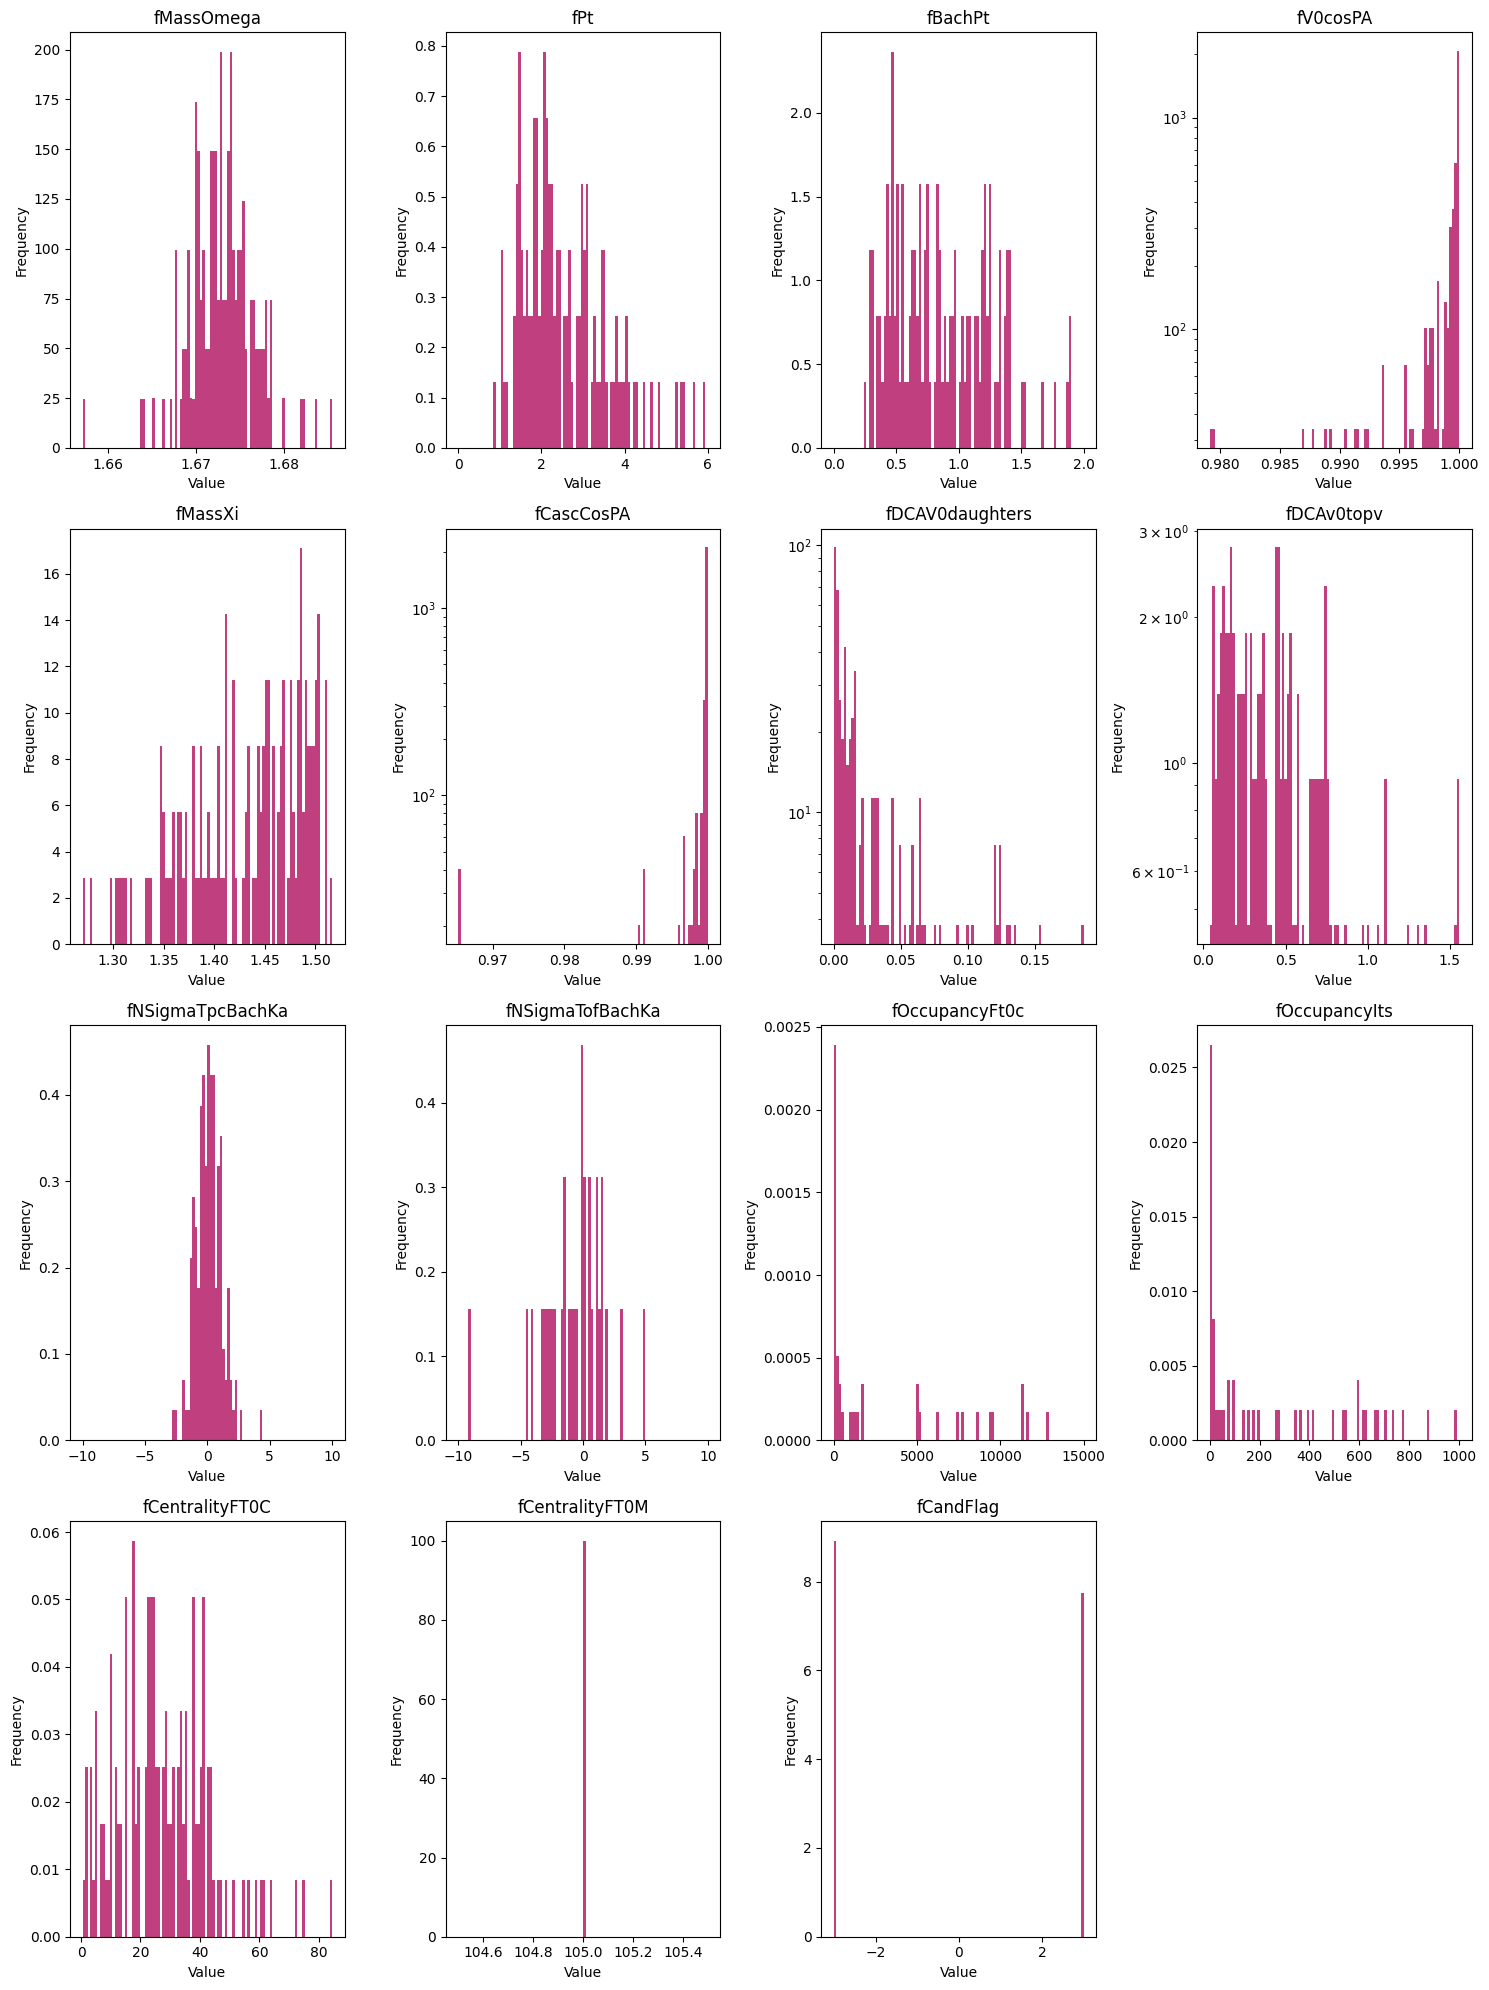

In [10]:
if df_mc_pbpb != "":
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_mc_pbpb.columns):
        axes[i].hist(merged_df_mc_pbpb[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", color='blue', density=True)
        axes[i].hist(sel_merged_df_mc_pbpb[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", color='red', density=True)
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')
    
    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()